In [1]:
import pandas as pd
import webpuzzle
import time

from itertools import product
from puzzle import BinaryPuzzle

In [2]:
N_PUZZLES = 10
PUZZLE_SIZES = [6, 8, 10, 12, 14]
PUZZLE_DIFFICULTIES = list(webpuzzle.Difficulty)

In [3]:
def analyze_puzzles(n_puzzles=N_PUZZLES, puzzle_sizes=PUZZLE_SIZES, puzzle_difficulties=PUZZLE_DIFFICULTIES, outpath='puzzles'):
    df_result = []
    for size, difficulty in product(puzzle_sizes, puzzle_difficulties):
        for idx in range(n_puzzles):
            input_puzzle = webpuzzle.get(idx=idx, size=size, difficulty=difficulty)
            puzzle = BinaryPuzzle(input_puzzle)
            if outpath:
                puzzle.to_csv(
                    f'{outpath}/{size}x{size}/{difficulty.name.lower()}/{idx+1}/puzzle.csv')

            start_time = time.perf_counter()
            solutions = puzzle.solve()
            run_time = time.perf_counter() - start_time

            if len(solutions) == 0:
                df_result.append(pd.Series({'size': size, 'difficulty': difficulty.name.lower(), 'idx': idx+1,
                               'puzzle': input_puzzle, 'solution_counts': 0, 'solutions': None,
                               'solution_validity': False, 'run_time': run_time}))
            else:
                for i, solution in enumerate(solutions):
                    df_result.append(pd.Series({'size': size, 'difficulty': difficulty.name.lower(), 'idx': idx+1,
                                                'puzzle': input_puzzle, 'solution_counts': len(solutions),
                                                'solution': solution.grid, 'solution_validity': solution.check(),
                                                'run_time': run_time}))
                    
                    solution.to_csv(
                        f'puzzles/{size}x{size}/{difficulty.name.lower()}/{idx+1}/solution{i+1}.csv')
                    
    return pd.DataFrame(df_result)


df = analyze_puzzles()

In [4]:
df

,size,difficulty,idx,puzzle,solution_counts,solution,solution_validity,run_time
0,6,easy,1,"[[1, -1, -1, 0, -1, -1], [-1, -1, 0, 0, -1, 1]...",1,"[[1, 0, 1, 0, 1, 0], [0, 1, 0, 0, 1, 1], [1, 0...",True,0.041150
1,6,easy,2,"[[-1, -1, 0, -1, -1, 1], [1, -1, 0, 0, -1, -1]...",1,"[[1, 0, 0, 1, 0, 1], [1, 1, 0, 0, 1, 0], [0, 1...",True,0.051278
2,6,easy,3,"[[-1, 0, -1, -1, -1, -1], [1, -1, -1, 0, 0, -1...",1,"[[1, 0, 0, 1, 1, 0], [1, 0, 1, 0, 0, 1], [0, 1...",True,0.051217
3,6,easy,4,"[[1, -1, 1, 1, -1, 0], [-1, 0, -1, -1, -1, -1]...",1,"[[1, 0, 1, 1, 0, 0], [0, 0, 1, 1, 0, 1], [1, 1...",True,0.038767
4,6,easy,5,"[[0, 0, -1, -1, 1, 1], [0, -1, -1, -1, -1, 1],...",1,"[[0, 0, 1, 0, 1, 1], [0, 1, 0, 1, 0, 1], [1, 0...",True,0.040392
...,...,...,...,...,...,...,...,...
195,14,very_hard,6,"[[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -...",1,"[[0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1], [...",True,0.106465
196,14,very_hard,7,"[[-1, -1, -1, -1, -1, 0, -1, -1, 0, 0, -1, -1,...",1,"[[1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1], [...",True,0.092462
197,14,very_hard,8,"[[-1, 0, -1, -1, 1, -1, -1, 0, 0, -1, 1, -1, -...",1,"[[1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0], [...",True,0.132055
198,14,very_hard,9,"[[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, ...",1,"[[1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1], [...",True,0.083285


In [5]:
df.value_counts('solution_counts')

solution_counts
1    200
Name: count, dtype: int64

In [6]:
print(BinaryPuzzle(df.iloc[0].puzzle))

┌───┬───┬───┬───┬───┬───┐
│ 1 │   │   │ 0 │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │ 0 │ 0 │   │ 1 │
├───┼───┼───┼───┼───┼───┤
│   │ 0 │ 0 │   │   │ 1 │
├───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│ 0 │ 0 │   │ 1 │   │   │
├───┼───┼───┼───┼───┼───┤
│   │ 1 │   │   │ 0 │ 0 │
└───┴───┴───┴───┴───┴───┘



In [7]:
print(BinaryPuzzle(df.iloc[0].solution))

┌───┬───┬───┬───┬───┬───┐
│ 1 │ 0 │ 1 │ 0 │ 1 │ 0 │
├───┼───┼───┼───┼───┼───┤
│ 0 │ 1 │ 0 │ 0 │ 1 │ 1 │
├───┼───┼───┼───┼───┼───┤
│ 1 │ 0 │ 0 │ 1 │ 0 │ 1 │
├───┼───┼───┼───┼───┼───┤
│ 0 │ 1 │ 1 │ 0 │ 1 │ 0 │
├───┼───┼───┼───┼───┼───┤
│ 0 │ 0 │ 1 │ 1 │ 0 │ 1 │
├───┼───┼───┼───┼───┼───┤
│ 1 │ 1 │ 0 │ 1 │ 0 │ 0 │
└───┴───┴───┴───┴───┴───┘



<Axes: title={'center': 'run_time'}, xlabel='size'>

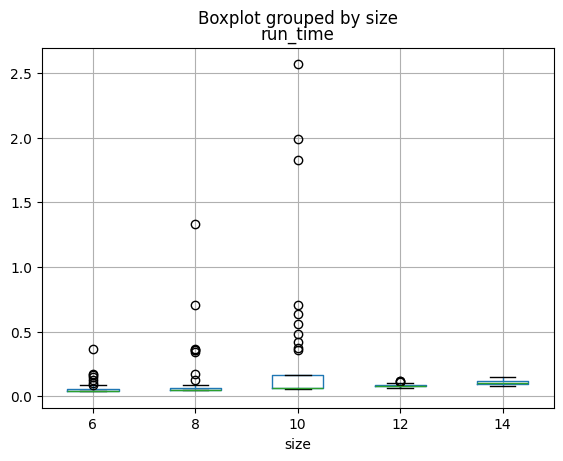

In [8]:
df.boxplot('run_time', by='size')

<Axes: title={'center': 'run_time'}, xlabel='size'>

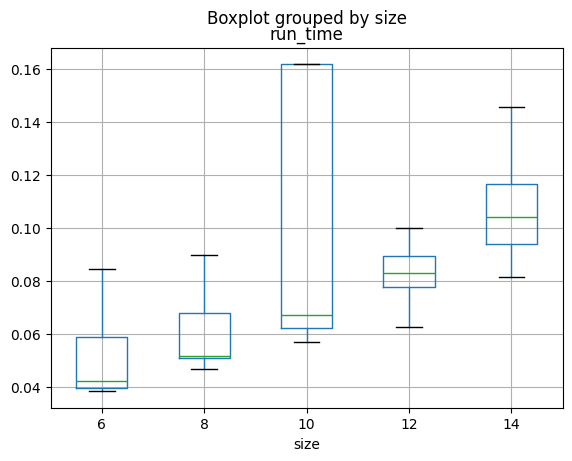

In [9]:
df.boxplot('run_time', by='size', showfliers=False)

In [10]:
df.query("run_time > 0.5")

,size,difficulty,idx,puzzle,solution_counts,solution,solution_validity,run_time
76,8,very_hard,7,"[[-1, 0, -1, -1, 0, -1, -1, -1], [-1, -1, -1, ...",1,"[[0, 0, 1, 1, 0, 0, 1, 1], [0, 1, 1, 0, 0, 1, ...",True,1.333053
77,8,very_hard,8,"[[-1, -1, -1, 0, -1, -1, 1, -1], [-1, 1, 1, -1...",1,"[[1, 0, 1, 0, 0, 1, 1, 0], [0, 1, 1, 0, 0, 1, ...",True,0.707715
110,10,very_hard,1,"[[-1, 1, -1, 1, -1, 0, -1, -1, 1, -1], [0, -1,...",1,"[[0, 1, 0, 1, 1, 0, 0, 1, 1, 0], [0, 1, 0, 1, ...",True,0.561374
111,10,very_hard,2,"[[-1, -1, -1, -1, -1, -1, -1, -1, 0, -1], [-1,...",1,"[[0, 1, 1, 0, 1, 1, 0, 1, 0, 0], [0, 0, 1, 1, ...",True,0.635959
112,10,very_hard,3,"[[-1, -1, -1, 0, 1, -1, -1, -1, 0, -1], [1, -1...",1,"[[0, 1, 1, 0, 1, 0, 1, 0, 0, 1], [1, 0, 1, 0, ...",True,1.992571
113,10,very_hard,4,"[[-1, -1, -1, -1, -1, -1, -1, 0, -1, 0], [-1, ...",1,"[[1, 0, 0, 1, 0, 1, 1, 0, 1, 0], [0, 1, 1, 0, ...",True,0.707478
114,10,very_hard,5,"[[-1, -1, -1, -1, -1, 0, -1, -1, 1, -1], [-1, ...",1,"[[1, 0, 0, 1, 1, 0, 0, 1, 1, 0], [0, 0, 1, 0, ...",True,2.568085
118,10,very_hard,9,"[[-1, -1, 0, 1, -1, -1, -1, -1, 1, -1], [-1, -...",1,"[[1, 0, 0, 1, 1, 0, 0, 1, 1, 0], [0, 1, 1, 0, ...",True,1.827642


<Axes: title={'center': 'run_time'}, xlabel='difficulty'>

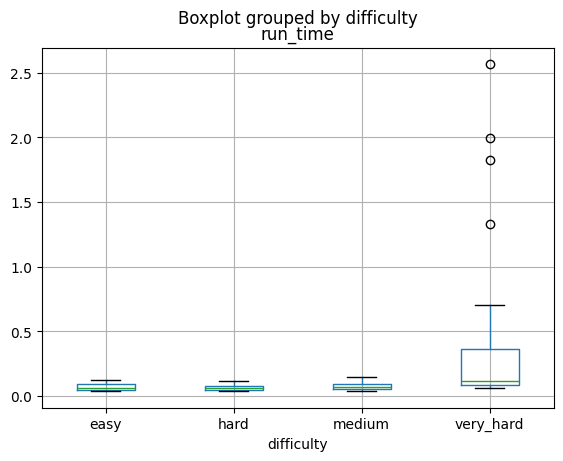

In [11]:
df.boxplot('run_time', by='difficulty')

<Axes: title={'center': 'run_time'}, xlabel='difficulty'>

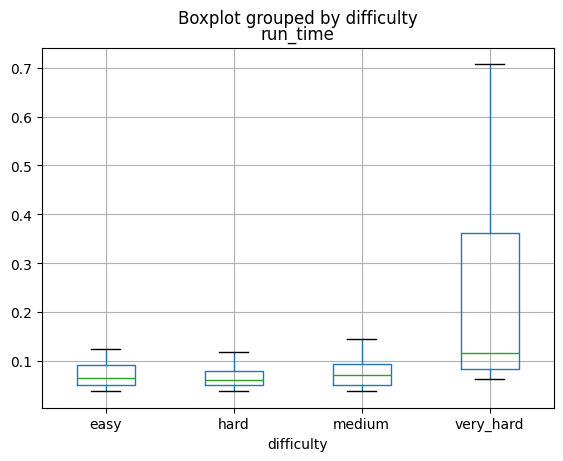

In [12]:
df.boxplot('run_time', by='difficulty', showfliers=False)